# Определение языка и VK API

В данном задании вам нужно будет:

* используя API Вконтакте, скачать комментарии к первым ста постам из пяти сообществ
* натренировать модель распознавания языков на статьях из Википедии.
* распознать язык всех комментариев, где в тексте есть 10 и более символов, и построить статистику

## VK API

Для подключения к ВКонтакте мы будем использовать VK API. Здесь есть документация к этой библиотеке https://vk-api.readthedocs.io/en/latest/

In [1]:
import vk_api

user = '' # вставьте сюда свой номер телефона
password = '' # вставьте сюда свой пароль

# авторизация
vk_session = vk_api.VkApi(login=user, password=password)
vk_session.auth()

vk = vk_session.get_api() # объект с API

Получить записи со страницы можно с помощью метода `wall.get`. Он принимает параметр `domain` — короткое имя пользователя или сообщества — и `count` — количество записей, которое вы хотите получить (максимум — 100). По Список методов для работы со стенами: https://vk.com/dev/wall

Например, вот так можно получить последние две записи с вот этой страницы https://vk.com/futureisnow. Выдача представляет собой словарь, в котором в поле `items` записан список словарей, содержащий информацию о каждой из записи. 

In [2]:
vk.wall.get(domain="futureisnow", count=2)

{'count': 8206,
 'items': [{'id': 250745,
   'from_id': -111587102,
   'owner_id': -111587102,
   'date': 1569782700,
   'marked_as_ads': 0,
   'post_type': 'post',
   'text': 'киберчечевица',
   'signer_id': 214990279,
   'attachments': [{'type': 'photo',
     'photo': {'id': 457288568,
      'album_id': -7,
      'owner_id': -111587102,
      'user_id': 100,
      'sizes': [{'type': 'm',
        'url': 'https://sun1-89.userapi.com/c858128/v858128777/8b779/Ltm8Dfz2PT0.jpg',
        'width': 97,
        'height': 130},
       {'type': 'o',
        'url': 'https://sun1-15.userapi.com/c858128/v858128777/8b77e/R5NBSNt6OQg.jpg',
        'width': 130,
        'height': 173},
       {'type': 'p',
        'url': 'https://sun1-94.userapi.com/c858128/v858128777/8b77f/n1NIX2ehAqQ.jpg',
        'width': 200,
        'height': 267},
       {'type': 'q',
        'url': 'https://sun1-93.userapi.com/c858128/v858128777/8b780/2RhPyv2nejE.jpg',
        'width': 320,
        'height': 427},
       {'type

С помощью метода `groups.getById` можно получить информацию о сообществе, в том числе его id.

In [3]:
vk.groups.getById(group_ids="futureisnow")

[{'id': 111587102,
  'name': 'киберпанк, который мы заслужили',
  'screen_name': 'futureisnow',
  'is_closed': 0,
  'type': 'page',
  'is_admin': 0,
  'is_member': 0,
  'is_advertiser': 0,
  'photo_50': 'https://sun1-29.userapi.com/c845124/v845124938/4b879/-EzOFg-vjTg.jpg?ava=1',
  'photo_100': 'https://sun1-14.userapi.com/c845124/v845124938/4b878/Lr9NW4jLxOU.jpg?ava=1',
  'photo_200': 'https://sun1-85.userapi.com/c845124/v845124938/4b877/dqfgJ42Ir5E.jpg?ava=1'}]

Скачайте информацию о последних ста записях в следующих пабликах: https://vk.com/futureisnow, https://vk.com/eternalclassic, https://vk.com/ukrlit_memes, https://vk.com/ukrainer_net, https://vk.com/amanzohel, https://vk.com/barg_kurumk_culture

In [4]:
# список domain'ов, чтобы вам не копировать их самими :)
publics = ["futureisnow",
           "eternalclassic",
           "ukrlit_memes",
           "ukrainer_net",
           "amanzohel",
           "barg_kurumk_culture"]

In [5]:
posts = {} # ключи — это паблики

for public in publics:
    posts[public] = vk.wall.get(domain = public, count = 100)

Найдите в документации (https://vk.com/dev/wall) метод для получения комментариев и получите первые сто комментариев каждого поста из выборки для каждого паблика.

In [6]:
def get_ownerId(public):
    groupInfo = vk.groups.getById(group_ids = public)
    ownerId = groupInfo[0]['id']
    return ownerId * -1

In [7]:
import re

corpora = {}
result = {}

for public in publics:
    for feature in posts[public]['items']:
        corpora = vk.wall.getComments(owner_id = get_ownerId(public), post_id = feature['id'], count = 100)
        for item in corpora['items']:
            try:
                if (len(item['text']) > 10):
                    comment = re.sub("\n", ' ', item['text'])
                    if public in result.keys():
                        result[public][item['id']] = comment
                    else:
                        result[public] = {}
                        result[public][item['id']] = comment
            except KeyError:
                continue

In [8]:
for key, value in result.items():
    print(key, value)

futureisnow {250746: 'Хороши с Cyfeer', 250705: 'костыли, которые заслужило дерево', 250708: 'Бля , человеку бы кору к еб*алу привинтить саморезами', 250709: 'Как оставить магнит в лесу', 250710: 'закладчики:', 250711: 'Оцинковка и людям подойдёт. Пусть тяжёлая-зато дёшево', 250713: 'Стальные двери в вашем дупле, недорого.', 250717: 'Дендрокиборги', 250724: 'Ц меня плечо на двух саморезах держится и ничего,не умер', 250728: 'Это стандартная практика при лечебно-оздоровительных мероприятиях для старовозрастных деревьев. После того, как из дупла удаляется гниль и проводится обработка, его закрывают либо сеткой либо оцинковкой. Другое дело, что можно поэстетичнее присобачить.', 250731: 'Ну что сказать, Кодзима гений...', 250736: 'что б закладки не ныкали', 250743: 'Нормальная практика для ЦПКиО им. Кирова в Санкт-Петербурге, например.  Потому, что Вы, человеки, пихаете в дупла всякую пое＊ень в виде бутылок, фантиков и прочий мусор.', 250684: 'для вас уже каждый пук цивилизации киберпанк? 

**Задание со звездочкой:** вы могли заметить, что если обращаться к каждому посту отдельно, то все занимает довольно продолжительное время (около пяти минут). Найдите в документации vk_api способ сделать это быстрее.

## Тренировка моделей

В наших комментариях встречались русский, украинский, английский и бурятский.

In [9]:
langs = {'ru', 'uk', 'en', 'bxr'}

Скачайте документы, на которых вы будете обучать свои модели. Для наших целей хорошо иметь для каждого языка корпус размером около 50 статей.

In [10]:
from collections import Counter

import nltk
import wikipedia

nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AleksandraB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def get_texts_for_lang(lang, n = 10):
    wiki_content = []
    wikipedia.set_lang(lang)
    pages = wikipedia.random(n)
    for page_name in pages:
        try:
            page = wikipedia.page(page_name)
            wiki_content.append("%s\n%s" % (page.title, page.content.replace('=', '')))
        except wikipedia.exceptions.WikipediaException:
            print("Skip %s" % page_name)
    return wiki_content

In [38]:
wiki_texts = {}

for lang in langs:
    wiki_texts[lang] = get_texts_for_lang(lang, 50)
    print(lang, len(wiki_texts[lang]))

bxr 50


c:\users\aleksandrab\appdata\local\programs\python\python37-32\lib\site-packages\wikipedia\wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\users\aleksandrab\appdata\local\programs\python\python37-32\lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skip Ама (посёлок)
Skip Украинский вестник (значения)
Skip Адамс, Самюэль
Skip Сидоров, Вячеслав
Skip Объединённая Арабская Республика (значения)
Skip Княгиничи
Skip Сальниково
Skip Кальехас
ru 42
Skip Strawberry Wine
Skip Jack Sharp (disambiguation)
en 48
Skip Геннадій Орбу
Skip Саліх (значення)
Skip Скоробогатько
Skip Капітанка
Skip Ренуар
uk 45


Сделайте определялку на частотах слов.

In [39]:
def collect_freqlist(wiki_pages, max_len = 100):
    freqlist = Counter()
    # не забудем про токенизацию - nltk.word_tokenize
    for text in wiki_pages:
        for word in nltk.word_tokenize(text.lower()):
            if word.isalpha():
                freqlist[word] += 1
    return dict(freqlist.most_common(max_len))

In [47]:
freq_lists = {}
for lang in langs:
    freq_lists[lang] = collect_freqlist(wiki_texts[lang])

In [41]:
def lang_detection(freq_lists, text):
    counts = Counter()
    for lang, freq_list in freq_lists.items():
        freq_list = Counter(freq_list)
        for word in nltk.word_tokenize(text):
            counts[lang] += int(freq_list[word] > 0)
    return counts.most_common()

Сделайте определялку на символьных энграммах.

In [16]:
from sklearn import feature_extraction
from sklearn import pipeline
from sklearn import naive_bayes
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

all_texts = []
lang_indices = []

for lang in langs:
    all_texts.extend(wiki_texts[lang])
    lang_indices.extend([lang] * len(wiki_texts[lang]))
    
clf = pipeline.Pipeline([
    ('vctr', feature_extraction.text.TfidfVectorizer(ngram_range=(1, 2), analyzer='char')),
    ('clf', naive_bayes.MultinomialNB())])

clf.fit(np.array(all_texts), np.array(lang_indices))

Populating the interactive namespace from numpy and matplotlib


Pipeline(memory=None,
         steps=[('vctr',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [17]:
clf.predict(all_texts)

array(['bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr',
       'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr',
       'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr',
       'bxr', 'bxr', 'ru', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr',
       'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr',
       'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr',
       'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr',
       'ru', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr',
       'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr',
       'ru', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr',
       'bxr', 'bxr', 'bxr', 'en', 'bxr', 'bxr', 'bxr', 'bxr', 'bxr', 'ru',
       'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru',
       'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru',
       'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru', 'ru',
       'r

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(all_texts,
                                                    lang_indices,
                                                    test_size=0.2,
                                                    random_state=0)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predicted)

In [19]:
print(y_predicted)
print(y_test)

['uk' 'ru' 'uk' 'en' 'en' 'bxr' 'uk' 'bxr' 'ru' 'bxr' 'en' 'en' 'en' 'ru'
 'en' 'bxr' 'uk' 'uk' 'bxr' 'ru' 'en' 'en' 'ru' 'uk' 'ru' 'en' 'uk' 'en'
 'uk' 'bxr' 'uk' 'bxr' 'bxr' 'en' 'bxr' 'ru' 'ru' 'ru' 'bxr' 'ru' 'bxr'
 'bxr' 'bxr' 'ru' 'uk' 'ru' 'uk' 'bxr' 'bxr' 'ru' 'bxr' 'uk' 'bxr' 'bxr'
 'ru' 'en' 'uk' 'en' 'ru' 'bxr' 'uk' 'ru' 'en' 'en' 'bxr' 'ru' 'en' 'bxr'
 'bxr' 'ru' 'en' 'uk' 'en' 'en' 'uk' 'bxr']
['uk', 'ru', 'uk', 'en', 'en', 'bxr', 'uk', 'bxr', 'ru', 'bxr', 'ru', 'en', 'en', 'ru', 'en', 'bxr', 'uk', 'uk', 'bxr', 'ru', 'en', 'en', 'ru', 'uk', 'ru', 'en', 'uk', 'en', 'uk', 'bxr', 'uk', 'bxr', 'bxr', 'en', 'bxr', 'ru', 'ru', 'ru', 'bxr', 'ru', 'bxr', 'bxr', 'bxr', 'ru', 'uk', 'ru', 'uk', 'bxr', 'bxr', 'ru', 'bxr', 'uk', 'bxr', 'bxr', 'ru', 'en', 'uk', 'en', 'ru', 'bxr', 'uk', 'ru', 'en', 'en', 'bxr', 'ru', 'en', 'bxr', 'bxr', 'ru', 'en', 'uk', 'en', 'en', 'uk', 'bxr']


In [20]:
def test_classify(y_test, y_predicted, label_names):
    cm = metrics.confusion_matrix(y_test, y_predicted)
    
    plt.figure(figsize=(10, 10))
    plt.ylim(10.5, -0.5)
    sns.heatmap(cm, annot=True,  fmt='', xticklabels=label_names, yticklabels=label_names)
    plt.title('Confusion Matrix')
    
    print(metrics.classification_report(y_test, y_predicted,
                                        target_names=label_names))

              precision    recall  f1-score   support

         bxr       1.00      1.00      1.00        23
          en       0.95      1.00      0.97        18
          ru       1.00      0.95      0.97        19
          uk       1.00      1.00      1.00        16

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76



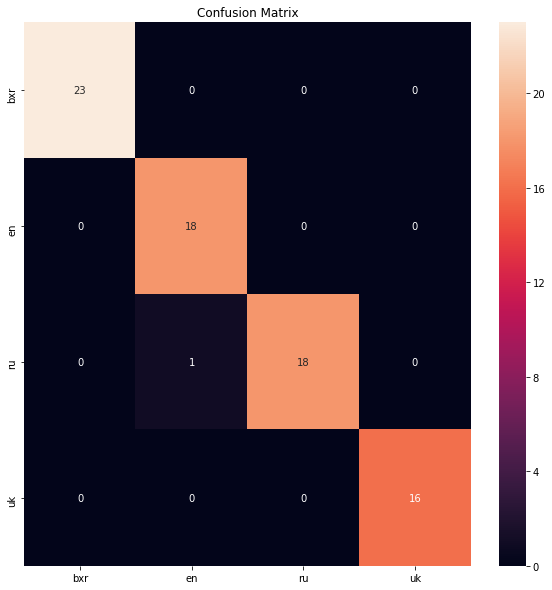

In [21]:
test_classify(y_test, y_predicted, clf.classes_)

# Определение языка

Определите язык каждого комментария в каждом паблике с помощью определялки на частотах слов и покажите доли языков среди комментариев для каждого паблика.

In [42]:
lang_detects_freqs = {}

for public, comment in result.items():
    for comment_id, text in comment.items():
        try:
            lang = lang_detection(freq_lists, text)[0][0]
            if public in lang_detects_freqs.keys():
                lang_detects_freqs[public][lang] += 1
                lang_detects_freqs[public]['total'] += 1
            else:
                lang_detects_freqs[public] = {'ru' : 0, 'en' : 0, 'uk' : 0, 'bxr' : 0}
                lang_detects_freqs[public][lang] = 1
                lang_detects_freqs[public]['total'] = 1
        except IndexError:
            print('Ошибка в паблике ' + public + ' в комментарии ' + str(comment_id) + ': ' + text)

Ошибка в паблике eternalclassic в комментарии 1025952:            
Ошибка в паблике eternalclassic в комментарии 1025709:            


In [43]:
results_freq = {}

for public in publics:
    results_freq[public] = {'ru' : ' ', 'en' : ' ', 'uk' : ' ', 'bxr' : ' '}
    for lang in langs:
        freq = lang_detects_freqs[public][lang]
        total = lang_detects_freqs[public]['total']
        results_freq[public][lang] = str(round(freq / total * 100)) + '%'
        
for key, value in results_freq.items():
    print(key, value)

futureisnow {'ru': '58%', 'en': '1%', 'uk': '3%', 'bxr': '39%'}
eternalclassic {'ru': '0%', 'en': '58%', 'uk': '0%', 'bxr': '42%'}
ukrlit_memes {'ru': '26%', 'en': '1%', 'uk': '34%', 'bxr': '39%'}
ukrainer_net {'ru': '21%', 'en': '0%', 'uk': '42%', 'bxr': '38%'}
amanzohel {'ru': '8%', 'en': '0%', 'uk': '1%', 'bxr': '91%'}
barg_kurumk_culture {'ru': '40%', 'en': '0%', 'uk': '1%', 'bxr': '59%'}


Сделайте то же самое для определителя на символьных энграммах.

In [ ]:
lang_detects_ngrams = {}
all_comments = []

for public, comment in result.items():
    for comment_id, text in comment.items():
        all_comments.append(text)

y_predicted_small = clf.predict(all_comments)
test_classify(y_test, y_predicted_small, clf.classes_)

Обсудите работу каждого из классификаторов, обсудите ошибки, объясните разницу в результатах.

Выводы:

Работа классификатора частотных слов сильно зависит от размера корпуса - на корпусе из 100 статей классификатор был более чувствителен к языку и, например, отнес к английскому большее число комментов из паблика eternalclassic, чем классификатор с корпусом из 50 текстов.
Также, возможно, Википедия не лучший выбор для обучения классфикатора для комментариев Вконтакте, так как в данном корпусе скорее не встретится слэнг, присущий языку комментариев, поэтому и классификатор частотных слов сработает не очень чисто.

При этом в каждом паблике вышло подозрительно много комментариев, относящихся к бурятскому - видимо, из-за того, что в список частотных слов бурятского попадает слово "он", частотное и для русского. Также в список частотных слов в бурятском попало английское "the" - отсюда большой процент бурятских комментов в паблике eternalclassic. Так что для совсем чистого анализа комментариев нужно использовать более "чистый" корпус, чем Википедия (либо дополнительно анализировать и чистить данные оттуда).